In [208]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

In [2]:
#path = "../Reources/Crash_Statistics_Victoria_clean.csv" 
crash_data = pd.read_csv("Resources/Crash_Statistics_Victoria_clean.csv")
crash_data.head()

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,...,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3401744,1/07/2013,18.30.00,Yes,Struck Pedestrian,Monday,Dark Street lights on,Not at intersection,Serious injury accident,60 km/hr,...,0,No,0,1,0,1,0,0,Local Road,Metro
1,3401745,2/07/2013,16.40.00,No,Collision with vehicle,Tuesday,Day,T intersection,Serious injury accident,60 km/hr,...,0,No,0,3,0,3,0,0,Arterial Other,Metro
2,3401746,2/07/2013,13.15.00,No,Collision with a fixed object,Tuesday,Day,T intersection,Serious injury accident,50 km/hr,...,0,Yes,0,1,0,1,0,0,Local Road,Metro
3,3401747,2/07/2013,16.45.00,No,Collision with a fixed object,Tuesday,Day,Not at intersection,Serious injury accident,110 km/hr,...,0,No,0,1,0,1,0,0,Freeway,Country
4,3401748,2/07/2013,15.48.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,1,0,1,Local Road,Metro


In [3]:
#check dimensions
crash_data.shape

(65435, 47)

In [4]:
#check missing values
crash_data.isnull().sum()

OBJECTID                0
ACCIDENT_DATE           0
ACCIDENT_TIME           0
ALCOHOLTIME             0
ACCIDENT_TYPE           0
DAY_OF_WEEK          1146
LIGHT_CONDITION         0
ROAD_GEOMETRY           0
SEVERITY                0
SPEED_ZONE              0
NODE_ID                 0
LONGITUDE               0
LATITUDE                0
NODE_TYPE               6
LGA_NAME                0
REGION_NAME             0
VICGRID_X               0
VICGRID_Y               0
TOTAL_PERSONS           0
INJ_OR_FATAL            0
FATALITY                0
SERIOUSINJURY           0
OTHERINJURY             0
NONINJURED              0
MALES                   0
FEMALES                 0
BICYCLIST               0
PASSENGER               0
DRIVER                  0
PEDESTRIAN              0
PILLION                 0
MOTORIST                0
UNKNOWN                 0
PED_CYCLIST_5_12        0
PED_CYCLIST_13_18       0
OLD_PEDESTRIAN          0
OLD_DRIVER              0
YOUNG_DRIVER            0
ALCOHOL_RELA

In [5]:
#remove NA values based on row
crash_data = crash_data.dropna(axis = 0)

In [6]:
#check missing values
crash_data.isnull().sum()


OBJECTID             0
ACCIDENT_DATE        0
ACCIDENT_TIME        0
ALCOHOLTIME          0
ACCIDENT_TYPE        0
DAY_OF_WEEK          0
LIGHT_CONDITION      0
ROAD_GEOMETRY        0
SEVERITY             0
SPEED_ZONE           0
NODE_ID              0
LONGITUDE            0
LATITUDE             0
NODE_TYPE            0
LGA_NAME             0
REGION_NAME          0
VICGRID_X            0
VICGRID_Y            0
TOTAL_PERSONS        0
INJ_OR_FATAL         0
FATALITY             0
SERIOUSINJURY        0
OTHERINJURY          0
NONINJURED           0
MALES                0
FEMALES              0
BICYCLIST            0
PASSENGER            0
DRIVER               0
PEDESTRIAN           0
PILLION              0
MOTORIST             0
UNKNOWN              0
PED_CYCLIST_5_12     0
PED_CYCLIST_13_18    0
OLD_PEDESTRIAN       0
OLD_DRIVER           0
YOUNG_DRIVER         0
ALCOHOL_RELATED      0
UNLICENCSED          0
NO_OF_VEHICLES       0
HEAVYVEHICLE         0
PASSENGERVEHICLE     0
MOTORCYCLE 

In [7]:
#check data dimensions
crash_data.shape

(63037, 47)

In [8]:
#load local government expenditure data, skip first row
localgov = pd.read_csv("Resources/lge_cleanfile.csv", skiprows = 1)
localgov.head(10)

,LGA_NAME_ALL,Local Roads - Sealed-length,Local Roads - Unsealed - Formed & Sheeted-length,Local Roads - Unsealed - Natural Surface_length,Total_roadlength,Local Roads - Sealed-expenditure,Local Roads - Unsealed - Formed & Sheeted-expenditure,Local Roads - Unsealed - Natural Surface-expenditure,Roads Ancillary-expenditure,Total-expenditure
0,Alpine,412,233,215,860,"3,748,129","265,116",0,0,"4,013,244"
1,Ararat,764,"1,420",240,"2,424","7,303,459","2,975,868","2,281","1,361,455","11,845,829"
2,Ballarat,"1,044",351,40,"1,435","41,874,084","3,196,942","363,289","1,045,194","46,775,611"
3,Banyule,538,6,1,545,"10,329,600",0,0,0,"10,329,600"
4,Bass Coast,563,373,7,943,"7,355,926","1,677,983",0,"789,457","9,923,525"
5,Baw Baw,"1,110",721,184,"2,015","13,512,590","3,092,182",0,"1,493,686","19,073,493"
6,Bayside,355,1,0,356,"5,547,236",0,0,"6,045,707","11,592,943"
7,Benalla,560,713,78,"1,351","2,504,772","1,474,785",0,0,"3,979,557"
8,Boroondara,562,0,0,562,"11,436,082",0,0,0,"11,436,082"
9,Brimbank,889,5,0,894,"25,715,082","344,474",0,"1,997,635","28,078,056"


In [9]:
#check dimensions
localgov.shape

(79, 10)

In [10]:
#check null values
localgov.isnull().sum()

LGA_NAME_ALL                                              0
Local Roads - Sealed-length                               0
Local Roads - Unsealed - Formed &  Sheeted-length         0
Local Roads - Unsealed - Natural Surface_length           0
Total_roadlength                                          0
Local Roads - Sealed-expenditure                          0
Local Roads - Unsealed - Formed &  Sheeted-expenditure    0
Local Roads - Unsealed - Natural Surface-expenditure      0
Roads Ancillary-expenditure                               0
Total-expenditure                                         0
dtype: int64

In [11]:
#unique lGA names on local gov dataset
localgov["LGA_NAME_ALL"].nunique()
localgov["LGA_NAME_ALL"].value_counts()

Monash              1
Melton              1
Horsham             1
Greater Bendigo     1
Colac Otway         1
                   ..
Wyndham             1
Darebin             1
Glen Eira           1
Campaspe            1
Yarriambiack        1
Name: LGA_NAME_ALL, Length: 79, dtype: int64

In [23]:
df1 = localgov.loc[localgov["Total_roadlength"], :]
df1.head()

KeyError: "None of [Index(['860', '2,424', '1,435', '545', '943', '2,015', '356', '1,351', '562',\n       '894', '0', '4,059', '1,561', '1,765', '1,280', '1,632', '2,369', '514',\n       '2,958', '705', '2,257', '483', '2,629', '1,864', '3,129', '690',\n       '2,280', '2,525', '1,509', '3,025', '431', '2,975', '1,357', '1,601',\n       '616', '724', '1,582', '4,718', '1,639', '605', '819', '305', '475',\n       '243', '1,169', '5,220', '1,514', '3,649', '736', '411', '1,526', '521',\n       '1,707', '1,428', '2,744', '1,201', '773', '3,375', '215', '2,036',\n       '43', '2,101', '2,992', '330', '2,204', '1,120', '3,489', '1,183',\n       '1,962', '337', '3,032', '2,775', '633', '1,259', '502', '1,558', '216',\n       '1,754', '4,821'],\n      dtype='object')] are in the [index]"

In [184]:
# Load in the csv data files
LGA_demo_path = "Resources/lga_demographics.csv"

# Read the weather data 
lga_demo_df = pd.read_csv(LGA_demo_path)

In [185]:
#Check the datafram import
lga_demo_df

,LGA Name,LGA Code,Departmental Region,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),Median household income,...,Journeys to work which are by car (rank),People with at least 2 hour daily commute,People with at least 2 hour daily commute (rank),People at increased risk of alcohol-related harm on a single occasion of drinking,People at increased risk of alcohol-related harm on a single occasion of drinking (rank),People reporting fair or poor health status,People reporting fair or poor health status (rank),"Clients that received Alcohol & Drug Treatment Services per 1,000 population","Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop
0,ALPINE,20110,Hume,987,35,0.238,33,0.448,21,829,...,77,0.083,35,0.561,6,0.193,10,1.0,78,12335
1,ARARAT,20260,Grampians,951,11,0.455,8,0.433,30,844,...,38,0.000,0,0.482,31,0.144,45,11.5,4,11599
2,BALLARAT,20570,Grampians,981,29,0.315,23,0.417,39,988,...,15,0.047,47,0.537,15,0.123,60,5.5,31,101689
3,BANYULE,20660,Northern Metropolitan,1047,67,0.083,60,0.369,68,1394,...,55,0.206,5,0.407,64,0.167,31,3.7,54,121869
4,BASS COAST,20740,Gippsland,978,27,0.216,36,0.438,26,855,...,25,0.068,40,0.452,44,0.177,20,7.1,17,32806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,WODONGA,27170,Hume,975,26,0.376,17,0.373,67,1075,...,5,0.000,0,0.531,18,0.118,63,3.4,60,39347
75,WYNDHAM,27260,Western Metropolitan,1013,55,0.193,45,0.369,69,1424,...,20,0.262,1,0.347,73,0.174,21,4.4,45,217118
76,YARRA,27350,Northern Metropolitan,1019,57,0.121,55,0.292,77,1680,...,78,0.034,52,0.551,12,0.148,43,7.3,14,86652
77,YARRA RANGES,27450,Eastern Metropolitan,1037,63,0.072,62,0.378,59,1281,...,19,0.175,10,0.448,47,0.152,37,6.4,23,149542


In [186]:
lga_demo_df.dtypes

LGA Name                                                                                     object
LGA Code                                                                                      int64
Departmental Region                                                                          object
Index of Relative Socio-Economic Disadvantage (IRSD)                                          int64
Index of Relative Socio-Economic Disadvantage (IRSD) (rank)                                   int64
Percentage of highly disadvantaged SA1s                                                     float64
Percentage of highly disadvantaged SA1s (rank)                                                int64
People with income less than $400 per week                                                  float64
People with income less than $400 per week (rank)                                             int64
Median household income                                                                       int64


In [187]:
#Rename the column name LGA Name to LGA
lga_demo_df2 = lga_demo_df.rename(columns={"LGA Name": "LGA"})


In [188]:
lga_demo_df2

,LGA,LGA Code,Departmental Region,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),Median household income,...,Journeys to work which are by car (rank),People with at least 2 hour daily commute,People with at least 2 hour daily commute (rank),People at increased risk of alcohol-related harm on a single occasion of drinking,People at increased risk of alcohol-related harm on a single occasion of drinking (rank),People reporting fair or poor health status,People reporting fair or poor health status (rank),"Clients that received Alcohol & Drug Treatment Services per 1,000 population","Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop
0,ALPINE,20110,Hume,987,35,0.238,33,0.448,21,829,...,77,0.083,35,0.561,6,0.193,10,1.0,78,12335
1,ARARAT,20260,Grampians,951,11,0.455,8,0.433,30,844,...,38,0.000,0,0.482,31,0.144,45,11.5,4,11599
2,BALLARAT,20570,Grampians,981,29,0.315,23,0.417,39,988,...,15,0.047,47,0.537,15,0.123,60,5.5,31,101689
3,BANYULE,20660,Northern Metropolitan,1047,67,0.083,60,0.369,68,1394,...,55,0.206,5,0.407,64,0.167,31,3.7,54,121869
4,BASS COAST,20740,Gippsland,978,27,0.216,36,0.438,26,855,...,25,0.068,40,0.452,44,0.177,20,7.1,17,32806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,WODONGA,27170,Hume,975,26,0.376,17,0.373,67,1075,...,5,0.000,0,0.531,18,0.118,63,3.4,60,39347
75,WYNDHAM,27260,Western Metropolitan,1013,55,0.193,45,0.369,69,1424,...,20,0.262,1,0.347,73,0.174,21,4.4,45,217118
76,YARRA,27350,Northern Metropolitan,1019,57,0.121,55,0.292,77,1680,...,78,0.034,52,0.551,12,0.148,43,7.3,14,86652
77,YARRA RANGES,27450,Eastern Metropolitan,1037,63,0.072,62,0.378,59,1281,...,19,0.175,10,0.448,47,0.152,37,6.4,23,149542


In [189]:
crash_demographics = crash_data.copy()

In [190]:
crash_demographics

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,...,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3401744,1/07/2013,18.30.00,Yes,Struck Pedestrian,Monday,Dark Street lights on,Not at intersection,Serious injury accident,60 km/hr,...,0,No,0,1,0,1,0,0,Local Road,Metro
1,3401745,2/07/2013,16.40.00,No,Collision with vehicle,Tuesday,Day,T intersection,Serious injury accident,60 km/hr,...,0,No,0,3,0,3,0,0,Arterial Other,Metro
2,3401746,2/07/2013,13.15.00,No,Collision with a fixed object,Tuesday,Day,T intersection,Serious injury accident,50 km/hr,...,0,Yes,0,1,0,1,0,0,Local Road,Metro
3,3401747,2/07/2013,16.45.00,No,Collision with a fixed object,Tuesday,Day,Not at intersection,Serious injury accident,110 km/hr,...,0,No,0,1,0,1,0,0,Freeway,Country
4,3401748,2/07/2013,15.48.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,1,0,1,Local Road,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65430,3467273,22/05/2018,15.44.00,No,Collision with vehicle,Tuesday,Day,Cross intersection,Other injury accident,60 km/hr,...,1,No,0,2,0,2,0,0,Arterial Highway,Country
65431,3467274,22/05/2018,17.32.00,No,Collision with vehicle,Tuesday,Dusk/Dawn,Not at intersection,Other injury accident,70 km/hr,...,0,No,0,3,0,3,0,0,Arterial Other,Metro
65432,3467275,22/05/2018,17.26.00,No,Collision with vehicle,Tuesday,Dark No street lights,Not at intersection,Other injury accident,60 km/hr,...,0,No,0,2,1,1,0,0,Arterial Other,Metro
65433,3467276,13/12/2017,16.35.00,No,Vehicle overturned (no collision),Wednesday,Day,T intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,1,1,0,Local Road,Metro


In [191]:
#Delete the row with a MOUNT BULLER ALPINE RESOR Statistic
crash_demographics[crash_demographics.LGA_NAME != 'MOUNT BULLER ALPINE RESOR']

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,...,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3401744,1/07/2013,18.30.00,Yes,Struck Pedestrian,Monday,Dark Street lights on,Not at intersection,Serious injury accident,60 km/hr,...,0,No,0,1,0,1,0,0,Local Road,Metro
1,3401745,2/07/2013,16.40.00,No,Collision with vehicle,Tuesday,Day,T intersection,Serious injury accident,60 km/hr,...,0,No,0,3,0,3,0,0,Arterial Other,Metro
2,3401746,2/07/2013,13.15.00,No,Collision with a fixed object,Tuesday,Day,T intersection,Serious injury accident,50 km/hr,...,0,Yes,0,1,0,1,0,0,Local Road,Metro
3,3401747,2/07/2013,16.45.00,No,Collision with a fixed object,Tuesday,Day,Not at intersection,Serious injury accident,110 km/hr,...,0,No,0,1,0,1,0,0,Freeway,Country
4,3401748,2/07/2013,15.48.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,1,0,1,Local Road,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65430,3467273,22/05/2018,15.44.00,No,Collision with vehicle,Tuesday,Day,Cross intersection,Other injury accident,60 km/hr,...,1,No,0,2,0,2,0,0,Arterial Highway,Country
65431,3467274,22/05/2018,17.32.00,No,Collision with vehicle,Tuesday,Dusk/Dawn,Not at intersection,Other injury accident,70 km/hr,...,0,No,0,3,0,3,0,0,Arterial Other,Metro
65432,3467275,22/05/2018,17.26.00,No,Collision with vehicle,Tuesday,Dark No street lights,Not at intersection,Other injury accident,60 km/hr,...,0,No,0,2,1,1,0,0,Arterial Other,Metro
65433,3467276,13/12/2017,16.35.00,No,Vehicle overturned (no collision),Wednesday,Day,T intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,1,1,0,Local Road,Metro


### Final tidy up of the data to get ready for analysis

In [192]:
#Create a new DataFrame to enable work below (cleaned)
crash_demographic_clean = crash_demographics[["OBJECTID", "LGA_NAME", "TOTAL_PERSONS", "INJ_OR_FATAL", "FATALITY", "SERIOUSINJURY", "OTHERINJURY", "NONINJURED", "ALCOHOL_RELATED"]]


In [193]:
#Group data to calculate the number of crashes per LGA (excluding alcohol related crashes)
LGA_crash_count = crash_demographic_clean.groupby(["LGA_NAME"])["OBJECTID"].count()
LGA_total_inj = crash_demographic_clean.groupby(["LGA_NAME"])["TOTAL_PERSONS"].sum()
LGA_total_inj_or_fatal = crash_demographic_clean.groupby(["LGA_NAME"])["INJ_OR_FATAL"].sum()
LGA_total_fatal = crash_demographic_clean.groupby(["LGA_NAME"])["FATALITY"].sum()
LGA_total_serious = crash_demographic_clean.groupby(["LGA_NAME"])["SERIOUSINJURY"].sum()
LGA_total_minor = crash_demographic_clean.groupby(["LGA_NAME"])["OTHERINJURY"].sum()
LGA_total_no_injury = crash_demographic_clean.groupby(["LGA_NAME"])["NONINJURED"].sum()


In [194]:
#Calculate the number of alcohol related crashes and group by lGA *********
LGA_count_alcohol = crash_demographic_clean.loc[crash_demographic_clean["ALCOHOL_RELATED"] == "Yes"]
LGA_total_alcohol = LGA_count_alcohol.groupby(["LGA_NAME"])["ALCOHOL_RELATED"].count()

In [195]:
#Create a new grouped dataframe 
grouped_LGA_totals = pd.DataFrame({"total_crashes": LGA_crash_count,
                                  "total_inj": LGA_total_inj,
                                  "inj_fatal": LGA_total_inj_or_fatal,
                                   "fatal": LGA_total_fatal,
                                   "serious": LGA_total_serious,
                                   "minor": LGA_total_minor,
                                   "no_inj": LGA_total_no_injury,
                                   "alcohol": LGA_total_alcohol
                                  })

In [196]:
#Replace the NaN in the file with a 0
grouped_LGA_totals["alcohol"] = grouped_LGA_totals["alcohol"].fillna(0)

In [197]:
grouped_LGA_totals.tail(20)

,total_crashes,total_inj,inj_fatal,fatal,serious,minor,no_inj,alcohol
QUEENSCLIFFE,8,20,9,0,2,7,11,0.0
SHEPPARTON,752,1899,1075,29,366,680,824,37.0
SOUTH GIPPSLAND,448,878,607,22,170,415,271,23.0
SOUTHERN GRAMPIANS,150,283,195,8,88,99,88,6.0
STONNINGTON,1407,3275,1606,7,406,1193,1669,32.0
STRATHBOGIE,205,438,297,15,138,144,141,9.0
SURF COAST,391,835,501,15,177,309,334,17.0
SWAN HILL,217,514,311,11,97,203,203,20.0
TOWONG,148,221,183,4,77,102,38,5.0
WANGARATTA,299,582,404,16,132,256,178,15.0


In [198]:
#Set the index
group_LGA = grouped_LGA_totals.rename_axis("LGA").reset_index()

In [237]:
group_LGA.head(50)

,LGA,total_crashes,total_inj,inj_fatal,fatal,serious,minor,no_inj,alcohol
0,ALPINE,227,437,281,4,93,184,156,6.0
1,ARARAT,150,344,221,8,71,142,123,5.0
2,BALLARAT,1134,2918,1531,20,316,1195,1387,56.0
3,BANYULE,909,2224,1127,10,247,870,1097,18.0
4,BASS COAST,340,878,485,11,142,332,393,20.0
5,BAW BAW,780,1404,950,16,292,642,454,28.0
6,BAYSIDE,799,1882,964,12,290,662,918,20.0
7,BENALLA,192,484,249,10,96,143,235,5.0
8,BENDIGO,1282,2941,1610,23,426,1161,1331,53.0
9,BOROONDARA,1440,3312,1630,14,384,1232,1682,37.0


In [200]:
#Merge the Database to do the demographics analysis
#merged_lga = lga_demo_df.merge(group_LGA, how="left", on=["LGA"])
LGA_merged = pd.merge(lga_demo_df2, group_LGA, how="outer", on="LGA")

In [201]:
LGA_merged

,LGA,LGA Code,Departmental Region,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),Median household income,...,"Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop,total_crashes,total_inj,inj_fatal,fatal,serious,minor,no_inj,alcohol
0,ALPINE,20110,Hume,987,35,0.238,33,0.448,21,829,...,78,12335,227,437,281,4,93,184,156,6.0
1,ARARAT,20260,Grampians,951,11,0.455,8,0.433,30,844,...,4,11599,150,344,221,8,71,142,123,5.0
2,BALLARAT,20570,Grampians,981,29,0.315,23,0.417,39,988,...,31,101689,1134,2918,1531,20,316,1195,1387,56.0
3,BANYULE,20660,Northern Metropolitan,1047,67,0.083,60,0.369,68,1394,...,54,121869,909,2224,1127,10,247,870,1097,18.0
4,BASS COAST,20740,Gippsland,978,27,0.216,36,0.438,26,855,...,17,32806,340,878,485,11,142,332,393,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,WODONGA,27170,Hume,975,26,0.376,17,0.373,67,1075,...,60,39347,267,600,350,9,93,248,250,3.0
75,WYNDHAM,27260,Western Metropolitan,1013,55,0.193,45,0.369,69,1424,...,45,217118,1385,3521,1737,25,460,1252,1784,45.0
76,YARRA,27350,Northern Metropolitan,1019,57,0.121,55,0.292,77,1680,...,14,86652,1564,3486,1722,6,431,1285,1764,19.0
77,YARRA RANGES,27450,Eastern Metropolitan,1037,63,0.072,62,0.378,59,1281,...,23,149542,1860,4050,2413,34,741,1638,1637,82.0


### Calculate and plot the overall statistics for the number of crashes per Local Government Agency

In [202]:
#Show the overall general statistics for a quick perusal
LGA_merged.describe()

,LGA Code,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),Median household income,Median household income (rank),Median house price,...,"Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop,total_crashes,total_inj,inj_fatal,fatal,serious,minor,no_inj,alcohol
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,24030.632911,996.746835,40.012658,0.230633,39.898734,0.414823,40.000000,1102.607595,39.949367,4.342945e+05,...,39.000000,74913.126582,797.936709,1905.493671,1009.607595,15.531646,274.265823,719.810127,895.886076,27.430380
std,2165.418975,44.637419,22.952847,0.167600,22.838673,0.052703,22.949219,289.089039,22.908905,3.084959e+05,...,22.949219,68775.865562,710.101570,1828.456291,870.186945,8.378598,214.450025,659.973097,966.182947,20.736246
min,20110.000000,895.000000,1.000000,0.000000,1.000000,0.241000,1.000000,685.000000,1.000000,9.000000e+04,...,0.000000,2854.000000,8.000000,20.000000,9.000000,0.000000,2.000000,7.000000,11.000000,0.000000
25%,22210.000000,964.500000,20.500000,0.089500,20.500000,0.378000,20.500000,882.000000,20.500000,2.327500e+05,...,19.500000,16003.000000,223.500000,463.500000,310.000000,9.500000,97.000000,183.500000,150.500000,11.500000
50%,24210.000000,993.000000,40.000000,0.212000,40.000000,0.417000,40.000000,1025.000000,40.000000,3.300020e+05,...,39.000000,45041.000000,573.000000,1223.000000,749.000000,15.000000,237.000000,480.000000,417.000000,22.000000
75%,25945.000000,1025.000000,59.500000,0.354500,59.500000,0.449000,59.500000,1297.500000,59.000000,5.895000e+05,...,58.500000,128006.500000,1286.500000,3061.000000,1588.000000,21.000000,385.500000,1172.500000,1476.000000,39.500000
max,27630.000000,1098.000000,79.000000,0.767000,76.000000,0.542000,79.000000,1893.000000,79.000000,1.550000e+06,...,78.000000,299296.000000,3593.000000,8942.000000,4155.000000,35.000000,974.000000,3162.000000,4787.000000,97.000000


<BarContainer object of 79 artists>

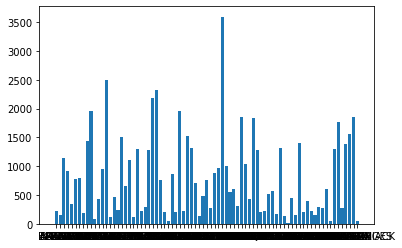

In [216]:
plt.bar(LGA_merged["LGA"], LGA_merged["total_crashes"])

Explore crashes by LGA population for an overall persepective

In [203]:
#Calculate the correlation coefficient to see if there is a correlation between total population and the number of crashes
round(st.pearsonr(LGA_merged["Total_pop"], LGA_merged["total_crashes"])[0], 2)

0.89

In [210]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
summary_slope, summary_int, summary_r, summary_p, summary_std_err = stats.linregress(LGA_merged["Total_pop"], LGA_merged["total_crashes"])

In [211]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
pop_summary_fit = summary_slope * LGA_merged["Total_pop"] + summary_int

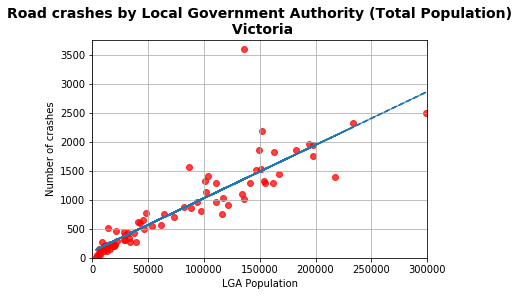

In [238]:
#Plot the linear model on the scatter plot

plt.scatter(LGA_merged["Total_pop"], LGA_merged["total_crashes"], facecolors="red", alpha = 0.75)
plt.plot(LGA_merged["Total_pop"], pop_summary_fit, "--")
plt.xlabel("LGA Population")
plt.ylabel("Number of crashes")
plt.title("Road crashes by Local Government Authority (Total Population)\n Victoria", fontsize=14, fontweight="bold")
plt.xlim(0,300000)
plt.ylim(0,3750)
plt.grid()
plt.show()

Explore total crashes by LGA Index of Relative Socio-Economic Disadvantage (IRSD) - economic index

In [218]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"])[0], 2)

0.25

In [219]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
IRSD_slope, IRSD_int, IRSD_r, IRSD_p, IRSD_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"])

In [220]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
IRSD_summary_fit = IRSD_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + IRSD_int

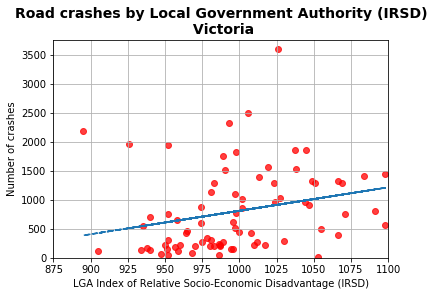

In [228]:
#Plot the linear model on the scatter plot

plt.scatter(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"], facecolors="red", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], IRSD_summary_fit, "--")
plt.xlabel("LGA Index of Relative Socio-Economic Disadvantage (IRSD)")
plt.ylabel("Number of crashes")
plt.title("Road crashes by Local Government Authority (IRSD)\n Victoria", fontsize=14, fontweight="bold")
plt.xlim(875,1100)
plt.ylim(0,3750)
plt.grid()
plt.show()

Explore total crashes by median weekly income


In [229]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Median household income"], LGA_merged["total_crashes"])[0], 2)

0.54

In [230]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
med_income_slope, med_income_int, med_income_r, med_income_p, med_income_std_err = stats.linregress(LGA_merged["Median household income"], LGA_merged["total_crashes"])

In [231]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
med_income_fit = med_income_slope * LGA_merged["Median household income"] + med_income_int

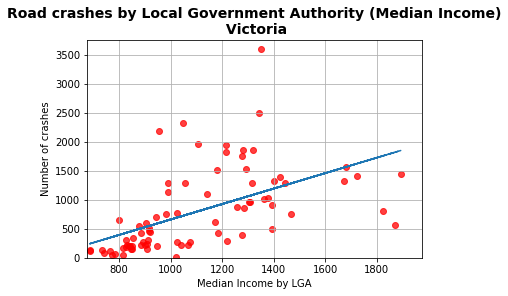

In [233]:
#Plot the linear model on the scatter plot

plt.scatter(LGA_merged["Median household income"], LGA_merged["total_crashes"], facecolors="red", alpha = 0.75)
plt.plot(LGA_merged["Median household income"], med_income_fit, "--")
plt.xlabel("Median Income by LGA")
plt.ylabel("Number of crashes")
plt.title("Road crashes by Local Government Authority (Median Income)\n Victoria", fontsize=14, fontweight="bold")
plt.xlim(675,1975)
plt.ylim(0,3750)
plt.grid()
plt.show()

Number of alcohol incidents by socio economic status of LGA


In [239]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])[0], 2)

0.09

In [240]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
booze_slope, booze_int, booze_r, booze_p, booze_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])

In [241]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
booze_fit = booze_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int

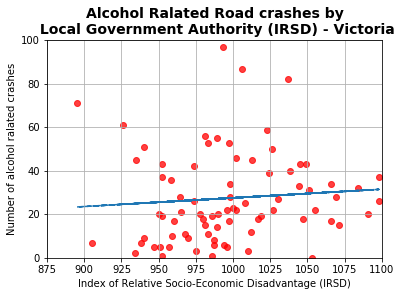

In [245]:
#Plot the linear model on the scatter plot

plt.scatter(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"], facecolors="red", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit, "--")
plt.xlabel("Index of Relative Socio-Economic Disadvantage (IRSD)")
plt.ylabel("Number of alcohol ralated crashes")
plt.title("Alcohol Ralated Road crashes by\n Local Government Authority (IRSD) - Victoria", fontsize=14, fontweight="bold")
plt.xlim(875,1100)
plt.ylim(0,100)
plt.grid()
plt.show()